# Model training and evaluation

Finally, we are able to build our network. It consists of the embedding layer (as already discussed above), an LSTM layer, and finally a dense layer, which outputs the probability of each star rating. As LSTMs are particularly prone to overfitting, dropout is once applied to the input connection within the LSTM nodes ("dropout=0.2") and once applied to the recurrent input signal on the LSTM units ("recurrent_dropout=0.2"). Indeed, when training the model without dropout, the test accuracy started to decrease after fourth epoch, while the training accuracy kept increasing.

Due to the nature of our task and the text corpus on which our pretrained embeddings were trained on, it might be a good idea to implement a bidirectional LSTM and to set the embeddings to be trainable. Despite significantly increasing the time needed to train one epoch, both options did not produce significantly better results. We therefore stick to the faster option which allows us to train various epochs due to its shorter training time for one epoch.

We then compile the model by specifying adam as the optimizer and categorical_crossentropy (i.e. log-loss) as the loss function.

In [0]:
model = Sequential()

#model.add(Embedding(len(word_index) + 1, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=True))
model.add(Embedding(len(word_index) + 1, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))

#model.add(LSTM(EMBEDDING_DIM))
#model.add(Bidirectional(LSTM(EMBEDDING_DIM, dropout=0.2, recurrent_dropout=0.2)))
model.add(LSTM(EMBEDDING_DIM, dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(5, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
#6x - only for internal use to save time running the same code aganin
!cp "/content/drive/My Drive/Colab Notebooks/trained models/model_3.9.h5" "model_3.9.h5"
model = load_model('model_3.9.h5')

After that, we are able to fit our model by specifying a batch size of 32. We end up training 10 epochs.

Note: Training one epoch took around 50 minutes on google colab. To avoid the risk of loosing the trained model in the middle of the training , we kept training one epoch at the time and saving the model and writing down the training/test accuracy. However, this also means that the training history is not visible for all the epochs in the next cell:

In [0]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

In [0]:
# - only for internal use to save time running the same code aganin
model.save("/content/drive/My Drive/Colab Notebooks/trained models/model_3.10.h5")

After 10 epochs, we achieve an accuracy of 71% on the test set. As the data is highly imbalanced, always predicting the majority class (five stars), should give us an intuitive and competitive benchmark. Applied on the test set, we obtain an accuracy of 61.5%. Another simple benchmark could also be the classification based on specific words or expressions. However, as this approach is not straight-froward in this case (e.g. should we assign a review containing the expression "didn´t like" to one or two stars?) and as the benchark accuracy of always predicting the majority class is already quite competitive, we decide not to implement such a benchmark model.

**We were therefore able to create an LSTM-based model with a test set accuracy of 71%, i.e. roughly 10% higher than the naive benchmark.**

In [0]:
#model 3 - pad 80 and dropout
acc = [0.6720, 0.6897, 0.6938, 0.6966, 0.6980, 0.6989, 0.7004, 0.7016, 0.7015, 0.7023]
val_acc = [0.6932, 0.7000, 0.7015, 0.7037, 0.7041, 0.7057, 0.7056, 0.7060, 0.7070, 0.7074]

#model 5 - pad 80 and no dropout
#acc = [0.6815, 0.7036, 0.7104, 0.7145, 0.7251]
#val_acc = [0.6976, 0.7055, 0.7089, 0.7090, 0.7085]

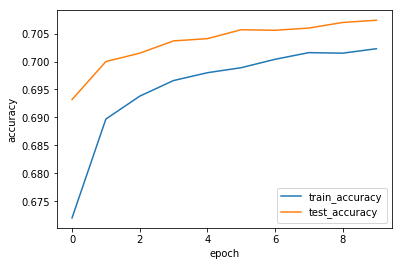

In [0]:
plt.plot(acc)
plt.plot(val_acc)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
plt.show()

In [0]:
# naive benchmark
i = 0
for num in range(y_test.shape[0]):
  if y_test[num][4] == max(y_test[num]):
    i = i+1
print(i/y_test.shape[0])

0.6148272144614922
